# Car Bayesian Network
Creating bayesian network to model use cases in [https://synergo.atlassian.net/wiki/spaces/CLNTMMC/pages/1812529153/RFP+-+Extra+use+cases+-+Appendix+A](https://synergo.atlassian.net/wiki/spaces/CLNTMMC/pages/1812529153/RFP+-+Extra+use+cases+-+Appendix+A).

Doing path-setting:

In [1]:
import os
import sys
from typing import *
from typing import Union, List, Any

import itertools

os.getcwd()
# Setting the baseline:
os.chdir('/development/projects/statisticallyfit/github/learningmathstat/PythonProbabilisticGraphicalModels')


curPath: str = os.getcwd() + "/src/PgmpyStudy/"

dataPath: str = os.getcwd() + "/src/_data/"
imagePath: str = curPath + 'images/'

print("curPath = ", curPath, "\n")
print("dataPath = ", dataPath, "\n")
print('imagePath = ', imagePath, "\n")


# Making files in utils folder visible here: to import my local print functions for nn.Module objects
sys.path.append(os.getcwd() + "/src/utils/")
# For being able to import files within PgmpyStudy folder
sys.path.append(curPath)

#sys.path.remove('/development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/utils/')
#sys.path.remove('/development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/PgmpyStudy/')

sys.path

curPath =  /development/projects/statisticallyfit/github/learningmathstat/PythonProbabilisticGraphicalModels/src/PgmpyStudy/ 

dataPath =  /development/projects/statisticallyfit/github/learningmathstat/PythonProbabilisticGraphicalModels/src/_data/ 

imagePath =  /development/projects/statisticallyfit/github/learningmathstat/PythonProbabilisticGraphicalModels/src/PgmpyStudy/images/ 



['/development/projects/statisticallyfit/github/learningmathstat/PythonProbabilisticGraphicalModels/src/PgmpyStudy',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python37.zip',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/lib-dynload',
 '',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/site-packages',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/site-packages/IPython/extensions',
 '/home/statisticallyfit/.ipython',
 '/development/projects/statisticallyfit/github/learningmathstat/PythonProbabilisticGraphicalModels/src/utils/',
 '/development/projects/statisticallyfit/github/learningmathstat/PythonProbabilisticGraphicalModels/src/PgmpyStudy/']

Science imports:

In [2]:
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD
from pgmpy.factors.discrete import JointProbabilityDistribution
from pgmpy.factors.discrete.DiscreteFactor import DiscreteFactor
from pgmpy.independencies import Independencies
from pgmpy.independencies.Independencies import IndependenceAssertion


from operator import mul
from functools import reduce


from src.utils.GraphvizUtil import *
from src.utils.NetworkUtil import *
from src.utils.DataUtil import *
from src.utils.GenericUtil import *

import pandas as pd
from pandas.core.frame import DataFrame

## Step 1: Creating / Loading Data

In [3]:
import collections

# Create named tuple class with names "Names" and "Objects"
RandomVariable = collections.namedtuple("RandomVariable", ["var", "states"])


ProcessType = RandomVariable(var = "ProcessType", states = ['Accel-Pedal',
                                                            'Door-Mount',
                                                            'Engine-Mount',
                                                            'Engine-Wiring',
                                                            'Oil-Fill',
                                                            'Sun-Roof-Housing'])

ToolType = RandomVariable(var = "ToolType", states = ['Forklift', 'Front-Right-Door', 'Oil', 'Power-Gun'])

InjuryType = RandomVariable(var = "InjuryType", states = ['Chemical-Burn',
                                                          'Contact-Contusion',
                                                          'Electrical-Burn',
                                                          'Electrical-Shock',
                                                          'Fall-Gtm'])

#AbsenteeismLevel = RandomVariable(var = "AbsenteeismLevel", states =  ['Absenteeism-00',
#                                                                       'Absenteeism-01',
#                                                                       'Absenteeism-02',
#                                                                       'Absenteeism-03'])
AbsenteeismLevel = RandomVariable(var = "AbsenteeismLevel", states =  ['Low', 'Medium', 'High'])


# Make 30 days to represent 1 month
Time = RandomVariable(var = "Time", states = list(range(1, 31))) # list(map(lambda day : str(day), range(1, 31))))

#TrainingLevel = RandomVariable(var = "TrainingLevel", states = ['Training-00',
#                                                                'Training-01',
#                                                                'Training-02',
#                                                                'Training-03'])
TrainingLevel = RandomVariable(var = "TrainingLevel", states = ['Low', 'Medium', 'High'])

#ExertionLevel = RandomVariable(var = "ExertionLevel", states = ['Exertion-00',
#                                                                'Exertion-01',
#                                                                'Exertion-02',
#                                                                'Exertion-03'])
ExertionLevel = RandomVariable(var = "ExertionLevel", states = ['Low', 'Medium', 'High'])

#ExperienceLevel = RandomVariable(var = "ExperienceLevel", states = ['Experience-00',
#                                                                    'Experience-01',
#                                                                    'Experience-02',
#                                                                    'Experience-03'])
ExperienceLevel = RandomVariable(var = "ExperienceLevel", states = ['Low', 'Medium', 'High'])

#WorkCapacity = RandomVariable(var = "WorkCapacity", states = ['WorkCapacity-00',
#                                                              'WorkCapacity-01',
#                                                              'WorkCapacity-02',
#                                                              'WorkCapacity-03'])
WorkCapacity = RandomVariable(var = "WorkCapacity", states = ['Low', 'Medium', 'High'])

dataDict = {Time.var : Time.states,
            TrainingLevel.var : TrainingLevel.states,
            ExertionLevel.var : ExertionLevel.states,
            ExperienceLevel.var : ExperienceLevel.states,
            WorkCapacity.var : WorkCapacity. states,
            ProcessType.var : ProcessType.states,
            ToolType.var : ToolType.states,
            InjuryType.var : InjuryType.states,
            AbsenteeismLevel.var : AbsenteeismLevel.states}

In [4]:
# Reading in the use case data
# NOTE: reading in every column as string type so the Time variable will come out string
usecaseData: DataFrame = pd.read_csv(dataPath + 'WIKI_USECASES_4_5.csv', delimiter = ',', dtype = str)
usecaseData = cleanData(usecaseData)

# Now convert the Time to int:
usecaseData[Time.var] = usecaseData[Time.var].astype(int)

data = usecaseData
# TODO: Option to later concat with white noise data (like in CarDemo Manual from CausalnexStudy)
data

,Time,TrainingLevel,ExertionLevel,ExperienceLevel,WorkCapacity,ProcessType,ToolType,InjuryType,AbsenteeismLevel
0,1,Low,Low,Low,High,Engine-Mount,Forklift,Fall-Gtm,High
1,1,Low,Low,Low,High,Engine-Mount,Forklift,Contact-Contusion,High
2,1,Low,Low,Low,High,Engine-Mount,Forklift,Fall-Gtm,High
3,1,Low,Low,Low,High,Engine-Mount,Forklift,Contact-Contusion,Medium
4,1,Low,Low,Low,High,Engine-Mount,Forklift,Contact-Contusion,High
...,...,...,...,...,...,...,...,...,...
924,30,High,High,High,Low,Oil-Fill,Oil,Chemical-Burn,High
925,30,High,High,High,Low,Oil-Fill,Oil,Chemical-Burn,High
926,30,High,High,High,Low,Oil-Fill,Front-Right-Door,Chemical-Burn,Medium
927,30,High,High,High,Low,Oil-Fill,Front-Right-Door,Chemical-Burn,Medium


## Step 2: Create Network Structure

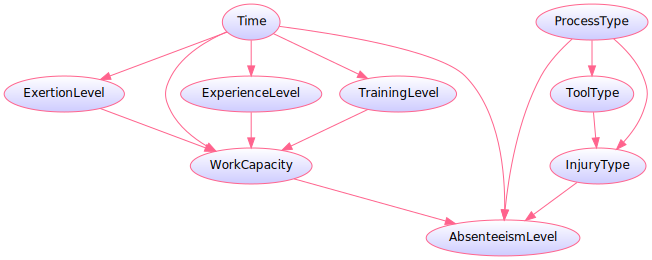

In [5]:

carModel: BayesianModel = BayesianModel([
    (ExertionLevel.var, WorkCapacity.var),
    (ExperienceLevel.var, WorkCapacity.var),
    (TrainingLevel.var, WorkCapacity.var),
    (WorkCapacity.var, AbsenteeismLevel.var),

    (Time.var, WorkCapacity.var),
    (Time.var, AbsenteeismLevel.var),
    (Time.var, ExertionLevel.var),
    (Time.var, ExperienceLevel.var),
    (Time.var, TrainingLevel.var),

    (ProcessType.var, ToolType.var),
    (ToolType.var, InjuryType.var),
    (ProcessType.var, InjuryType.var),
    (ProcessType.var, AbsenteeismLevel.var),
    (InjuryType.var, AbsenteeismLevel.var)
])


pgmpyToGraph(model = carModel)

## Step 3: Estimate CPDs

In [6]:
from pgmpy.estimators import BayesianEstimator

#est: BayesianEstimator = BayesianEstimator(model = carModel, data = data)

assert carModel.get_cpds() == [], "Check cpds are empty beforehand"

carModel.fit(data, estimator = BayesianEstimator,
             prior_type = "BDeu",
             equivalent_sample_size = 10)

In [7]:
pgmpyTabularToDataFrame(carModel, queryVar = Time.var)

Time,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,...,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333


In [8]:
pgmpyTabularToDataFrame(carModel, queryVar = ProcessType.var)

ProcessType,Engine-Mount,Engine-Wiring,Oil-Fill
,0.333333,0.432234,0.234432


In [9]:
pgmpyTabularToDataFrame(carModel, queryVar = ToolType.var)

ToolType,Forklift,Front-Right-Door,Oil,Power-Gun
ProcessType,,,,
Engine-Mount,0.991758,0.002747,0.002747,0.002747
Engine-Wiring,0.002119,0.002119,0.002119,0.993644
Oil-Fill,0.003906,0.425781,0.566406,0.003906


In [10]:
pgmpyTabularToDataFrame(carModel, queryVar = ExperienceLevel.var)

ExperienceLevel,High,Low,Medium
Time,,,
1,0.003663,0.992674,0.003663
2,0.003663,0.992674,0.003663
3,0.003663,0.992674,0.003663
4,0.003663,0.003663,0.992674
5,0.003663,0.003663,0.992674
6,0.003663,0.992674,0.003663
7,0.003663,0.992674,0.003663
8,0.003663,0.992674,0.003663
9,0.003663,0.992674,0.003663


In [11]:
pgmpyTabularToDataFrame(carModel, queryVar = WorkCapacity.var)

WorkCapacity                                          High       Low    Medium
ExertionLevel ExperienceLevel Time TrainingLevel                              
High          High            1    High           0.333333  0.333333  0.333333
                                   Low            0.333333  0.333333  0.333333
                                   Medium         0.333333  0.333333  0.333333
                              2    High           0.333333  0.333333  0.333333
                                   Low            0.333333  0.333333  0.333333
...                                                    ...       ...       ...
Medium        Medium          29   Low            0.333333  0.333333  0.333333
                                   Medium         0.333333  0.333333  0.333333
                              30   High           0.333333  0.333333  0.333333
                                   Low            0.333333  0.333333  0.333333
                                   Medium         0.333333  0.333333  0.333333

[810 rows x 3 columns]

In [12]:
pgmpyTabularToDataFrame(carModel, queryVar = InjuryType.var)

InjuryType                      Chemical-Burn  Contact-Contusion  \
ProcessType   ToolType                                             
Engine-Mount  Forklift               0.499307           0.299861   
              Front-Right-Door       0.250000           0.250000   
              Oil                    0.250000           0.250000   
              Power-Gun              0.250000           0.250000   
Engine-Wiring Forklift               0.250000           0.250000   
              Front-Right-Door       0.250000           0.250000   
              Oil                    0.250000           0.250000   
              Power-Gun              0.000533           0.000533   
Oil-Fill      Forklift               0.250000           0.250000   
              Front-Right-Door       0.993119           0.002294   
              Oil                    0.994828           0.001724   
              Power-Gun              0.250000           0.250000   

InjuryType                      Electrical-Shock  Fall-Gtm  
ProcessType   ToolType                                      
Engine-Mount  Forklift                  0.000693  0.200139  
              Front-Right-Door          0.250000  0.250000  
              Oil                       0.250000  0.250000  
              Power-Gun                 0.250000  0.250000  
Engine-Wiring Forklift                  0.250000  0.250000  
              Front-Right-Door          0.250000  0.250000  
              Oil                       0.250000  0.250000  
              Power-Gun                 0.537846  0.461087  
Oil-Fill      Forklift                  0.250000  0.250000  
              Front-Right-Door          0.002294  0.002294  
              Oil                       0.001724  0.001724  
              Power-Gun                 0.250000  0.250000

In [13]:
pgmpyTabularToDataFrame(carModel, queryVar = AbsenteeismLevel.var)





AbsenteeismLevel                                  High       Low    Medium
InjuryType    ProcessType  Time WorkCapacity                              
Chemical-Burn Engine-Mount 1    High          0.000616  0.998768  0.000616
                                Low           0.333333  0.333333  0.333333
                                Medium        0.333333  0.333333  0.333333
                           2    High          0.333333  0.333333  0.333333
                                Low           0.333333  0.333333  0.333333
...                                                ...       ...       ...
Fall-Gtm      Oil-Fill     29   Low           0.333333  0.333333  0.333333
                                Medium        0.333333  0.333333  0.333333
                           30   High          0.333333  0.333333  0.333333
                                Low           0.333333  0.333333  0.333333
                                Medium        0.333333  0.333333  0.333333

[1080 rows x 3 columns]

## Step 4: Inference in Bayesian Car Model

Now let us verify active trails or independencies, for each kind of chain (causal, evidential, common cause, and common evidence) that can be found along the paths of the car model graph

### 1/ Causal Reasoning in the Car Model
For a causal model $A \rightarrow B \rightarrow C$, there are two cases:
  * **Marginal Dependence:** ($B$ unknown): When $B$ is unknown / unobserved, there is an active trail between $A$ and $C$, meaning the probability of $A$ can influence probability of $C$ (and vice versa). We can say $P(A) \ne P(A \; | \; C)$
  * **Conditional Independence:** ($B$ fixed): When $B$ is fixed, there is NO active trail between $A$ and $C$, so they are independent, which means the probability of $A$ won't influence probability of $C$ (and vice versa). We can say $P(A) = P(A \; | \; C)$

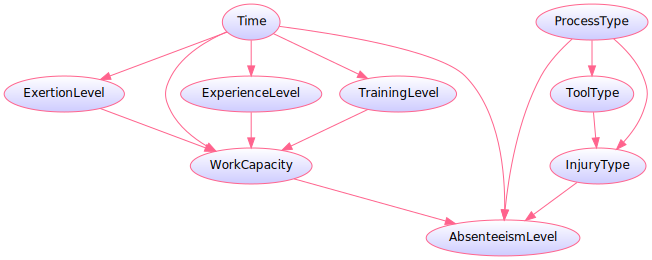

In [14]:
pgmpyToGraph(carModel)

#### Testing conditional independence:
$$
\color{DodgerBlue}{\text{WorkCapacity (observed)}: \;\;\;\;\;\;\;  \text{ExperienceLevel} \; \bot \; \text{AbsenteeismLevel} \; | \; \text{WorkCapacity}}
$$

Given that **WorkCapacity**'s state is observed, we can make the following equivalent statements:
* there is NO active trail between **ExperienceLevel** and **AbsenteeismLevel**.
* **ExperienceLevel** and **AbsenteeismLevel** are locally independent.
* the probability of **ExperienceLevel** won't influence probability of **AbsenteeismLevel** (and vice versa).


In [15]:
elim: VariableElimination = VariableElimination(model = carModel)

**Testing Conditional Independence:** Using Active Trails Methods

In [16]:
assert carModel.is_active_trail(start = ExperienceLevel.var, end = AbsenteeismLevel.var, observed = None)

assert carModel.is_active_trail(start = ExperienceLevel.var, end = AbsenteeismLevel.var, observed = [WorkCapacity.var]), "Check: still need to condition on extra variable for this not to be an active trail"

# Finding out which extra variable to condition on:
assert observedVars(carModel, startVar = ExperienceLevel.var, endVar = AbsenteeismLevel.var) == [{'Time', 'WorkCapacity'}], "Check: all list of extra variables to condition on to nullify active trail between Experience and Absenteeism"

# Check trail is nullified
assert not carModel.is_active_trail(start = ExperienceLevel.var, end = AbsenteeismLevel.var, observed = [WorkCapacity.var] + [Time.var]), "Check: active trail between Experience and Absenteeism is nullified with the extra variable observed"

# See, there is no active trail from ExperienceLevel to AbsenteeismLevel when observing WorkCapacity and time.
showActiveTrails(carModel, variables = [ExperienceLevel.var, AbsenteeismLevel.var], observed = [WorkCapacity.var, Time.var])

ExperienceLevel --> ExertionLevel
ExperienceLevel --> TrainingLevel
AbsenteeismLevel --> InjuryType
AbsenteeismLevel --> ProcessType
AbsenteeismLevel --> ToolType


**Testing Conditional Independence:** Using Probabilities

In [17]:
OBS_STATE_WORKCAPACITY: State = 'Low'
OBS_STATE_TIME: int = 23

backdoorStates: Dict[Variable, State] = {WorkCapacity.var : OBS_STATE_WORKCAPACITY, Time.var : OBS_STATE_TIME}


EWA: DiscreteFactor = elim.query(variables = [AbsenteeismLevel.var], evidence = backdoorStates)

EWA_1: DiscreteFactor = elim.query(variables = [AbsenteeismLevel.var], evidence = addEvidence(backdoorStates, {ExperienceLevel.var : 'High'}))

EWA_2: DiscreteFactor = elim.query(variables = [AbsenteeismLevel.var], evidence = addEvidence(backdoorStates, {ExperienceLevel.var : 'Medium'}))

EWA_3: DiscreteFactor = elim.query(variables = [AbsenteeismLevel.var], evidence = addEvidence(backdoorStates, {ExperienceLevel.var : 'Low'}))

print(EWA)

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1517.93it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 426.64it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/5 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 5/5 [00:00<00:00, 1916.78it/s]


  0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/5 [00:00<?, ?it/s]     

Eliminating: ProcessType:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 5/5 [00:00<00:00, 254.04it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/5 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 5/5 [00:00<00:00, 532.96it/s]


  0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/5 [00:00<?, ?it/s]     

Eliminating: ProcessType:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 5/5 [00:00<00:00, 360.52it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/5 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 5/5 [00:00<00:00, 1887.46it/s]


  0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/5 [00:00<?, ?it/s]     

Eliminating: ProcessType:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 5/5 [00:00<00:00, 354.68it/s]

+--------------------------+-------------------------+
| AbsenteeismLevel         |   phi(AbsenteeismLevel) |
+==========================+=========================+
| AbsenteeismLevel(High)   |                  0.4989 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Low)    |                  0.3994 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Medium) |                  0.1017 |
+--------------------------+-------------------------+



The probabilities above are stated formulaically as follows:

$$
\begin{array}{ll}
P(\text{AbsenteeismLevel} = \text{High} \; | \; \Big\{  \text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23  \Big\}) \\
= P(\text{AbsenteeismLevel} = \text{High} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{Low})  \\
= P(\text{AbsenteeismLevel} = \text{High} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{Medium}) \\
= P(\text{AbsenteeismLevel} = \text{High} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{High}) \\
= 0.4989
\end{array}
$$
$$
\begin{array}{ll}
P(\text{AbsenteeismLevel} = \text{Low} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\}) \\
= P(\text{AbsenteeismLevel} = \text{Low} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{Low})  \\
= P(\text{AbsenteeismLevel} = \text{Low} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{Medium}) \\
= P(\text{AbsenteeismLevel} = \text{Low} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{High}) \\
= 0.3994
\end{array}
$$
$$
\begin{array}{ll}
P(\text{AbsenteeismLevel} = \text{Medium} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\}) \\
= P(\text{AbsenteeismLevel} = \text{Medium} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{Low})  \\
= P(\text{AbsenteeismLevel} = \text{Medium} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{Medium}) \\
= P(\text{AbsenteeismLevel} = \text{Medium} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{High}) \\
= 0.1017
\end{array}
$$

Since all the above stated probabilities are equal for each state of `AbsenteeismLevel` = `Low`, `Medium`, `High`, we can assert that the random variables `ExperienceLevel` and `AbsenteeismLevel` are independent of each other, when observing `WorkCapacity` state (and also observing the state of `Time` to adjust for backdoors). Arbitrarily choosing the states `backdoorStates` = `{WorkCapacity = Low, Time = 23}`, we can write:
$$
P(\text{AbsenteeismLevel} \; | \; \{\texttt{backdoorStates} \}) = P(\text{AbsenteeismLevel} \; | \; \{ \texttt{backdoorStates} \} \; \cap \; \text{ExperienceLevel})
$$

In [18]:
assert allEqual(EWA.values, EWA_1.values, EWA_2.values, EWA_3.values), "Check: the random variables Experience and Absenteeism are independent, when intermediary node WorkCapacity is observed (while accounting for backdoors)"






#### Testing marginal dependence:
$$
\color{Green}{\text{WorkCapacity (unobserved)}: \;\;\;\;\;\;\;  \text{ExperienceLevel} \longrightarrow \text{WorkCapacity} \longrightarrow \text{AbsenteeismLevel}}
$$
Given that **WorkCapacity**'s state is unobserved, we can make the following equivalent statements:
* there IS active trail between **ExperienceLevel** and **AbsenteeismLevel**.
* **ExperienceLevel** and **AbsenteeismLevel** are dependent.
* the probability of **ExperienceLevel** influences probability of **AbsenteeismLevel** (and vice versa).


**Testing Conditional Independence:** Using Active Trails Methods

In [19]:
assert carModel.is_active_trail(start = ExperienceLevel.var, end = AbsenteeismLevel.var, observed = None)

# See, there is active trail from ExperienceLevel to AbsenteeismLevel when not observing WorkCapacity variable
showActiveTrails(carModel, variables = [ExperienceLevel.var, AbsenteeismLevel.var], observed = None)

ExperienceLevel --> ExertionLevel
ExperienceLevel --> Time
ExperienceLevel --> TrainingLevel
ExperienceLevel --> WorkCapacity
ExperienceLevel --> AbsenteeismLevel
AbsenteeismLevel --> InjuryType
AbsenteeismLevel --> ExertionLevel
AbsenteeismLevel --> Time
AbsenteeismLevel --> TrainingLevel
AbsenteeismLevel --> ProcessType
AbsenteeismLevel --> ExperienceLevel
AbsenteeismLevel --> WorkCapacity
AbsenteeismLevel --> ToolType


**Testing Conditional Independence:** Using Probabilities

In [20]:
#OBS_STATE_WORKCAPACITY: State = 'Low'
OBS_STATE_TIME: int = 23

backdoorStates: Dict[Variable, State] = {Time.var : OBS_STATE_TIME}

EA: DiscreteFactor = elim.query(variables = [AbsenteeismLevel.var], evidence = backdoorStates)
print(EA)

  0%|          | 0/7 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/7 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 7/7 [00:00<00:00, 2664.98it/s]


  0%|          | 0/7 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/7 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/7 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/7 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/7 [00:00<?, ?it/s]   

Eliminating: ToolType:   0%|          | 0/7 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/7 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/7 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 7/7 [00:00<00:00, 98.46it/s]

+--------------------------+-------------------------+
| AbsenteeismLevel         |   phi(AbsenteeismLevel) |
+==========================+=========================+
| AbsenteeismLevel(High)   |                  0.4965 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Low)    |                  0.3984 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Medium) |                  0.1052 |
+--------------------------+-------------------------+


In [21]:
EA_1: DiscreteFactor = elim.query(variables = [AbsenteeismLevel.var], evidence = addEvidence(backdoorStates, {ExperienceLevel.var : 'High'}))
print(EA_1)

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1169.14it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s] 

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 189.05it/s]

+--------------------------+-------------------------+
| AbsenteeismLevel         |   phi(AbsenteeismLevel) |
+==========================+=========================+
| AbsenteeismLevel(High)   |                  0.4973 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Low)    |                  0.3987 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Medium) |                  0.1040 |
+--------------------------+-------------------------+


In [22]:
EA_2: DiscreteFactor = elim.query(variables = [AbsenteeismLevel.var], evidence = addEvidence(backdoorStates, {ExperienceLevel.var : 'Medium'}))
print(EA_2)

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2471.36it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s] 

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 162.30it/s]

+--------------------------+-------------------------+
| AbsenteeismLevel         |   phi(AbsenteeismLevel) |
+==========================+=========================+
| AbsenteeismLevel(High)   |                  0.3885 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Low)    |                  0.3553 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Medium) |                  0.2561 |
+--------------------------+-------------------------+


In [23]:
EA_3: DiscreteFactor = elim.query(variables = [AbsenteeismLevel.var], evidence = addEvidence(backdoorStates, {ExperienceLevel.var : 'Low'}))
print(EA_3)

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2568.47it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s] 

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 161.98it/s]

+--------------------------+-------------------------+
| AbsenteeismLevel         |   phi(AbsenteeismLevel) |
+==========================+=========================+
| AbsenteeismLevel(High)   |                  0.3885 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Low)    |                  0.3553 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Medium) |                  0.2561 |
+--------------------------+-------------------------+



The probabilities above are stated formulaically as follows:
$$
\begin{array}{ll}
P(\text{AbsenteeismLevel} = \text{High} \; | \; \Big\{ \text{Time} = 23  \Big\}) = 0.4965 \\
\ne P(\text{AbsenteeismLevel} = \text{High} \; | \; \Big\{\text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{Low}) = 0.3885  \\
\ne P(\text{AbsenteeismLevel} = \text{High} \; | \; \Big\{\text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{Medium}) = 0.3885 \\
\ne P(\text{AbsenteeismLevel} = \text{High} \; | \; \Big\{\text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{High}) = 0.4973
\end{array}
$$
$$
\begin{array}{ll}
P(\text{AbsenteeismLevel} = \text{Low} \; | \; \Big\{ \text{Time} = 23  \Big\}) = 0.4965 \\
\ne P(\text{AbsenteeismLevel} = \text{Low} \; | \; \Big\{\text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{Low}) = 0.3553 \\
\ne P(\text{AbsenteeismLevel} = \text{Low} \; | \; \Big\{\text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{Medium}) = 0.3553 \\
\ne P(\text{AbsenteeismLevel} = \text{Low} \; | \; \Big\{\text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{High}) = 0.3987
\end{array}
$$
$$
\begin{array}{ll}
P(\text{AbsenteeismLevel} = \text{Medium} \; | \; \Big\{ \text{Time} = 23  \Big\}) = 0.4965 \\
\ne P(\text{AbsenteeismLevel} = \text{Medium} \; | \; \Big\{\text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{Low}) = 0.2561 \\
\ne P(\text{AbsenteeismLevel} = \text{Medium} \; | \; \Big\{\text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{Medium}) = 0.2561 \\
\ne P(\text{AbsenteeismLevel} = \text{Medium} \; | \; \Big\{\text{Time} = 23 \Big\} \; \cap \; \text{ExperienceLevel} = \text{High}) = 0.1040
\end{array}
$$

Since not all the above stated probabilities are equal for each state of `AbsenteeismLevel` = `Low`, `Medium`, `High`, we can assert that the random variables `ExperienceLevel` and `AbsenteeismLevel` are dependent of each other, when not observing `WorkCapacity` state (while  observing the state of `Time` to adjust for backdoors). Arbitrarily choosing the state `backdoorStates` = `{Time = 23}`, we can write:
$$
P(\text{AbsenteeismLevel} \; | \; \{\texttt{backdoorStates} \}) \ne P(\text{AbsenteeismLevel} \; | \; \{ \texttt{backdoorStates} \} \; \cap \; \text{ExperienceLevel})
$$

In [24]:

assert not allEqual(EA.values, EA_1.values, EA_2.values, EA_3.values), "Check: the random variables Experience and Absenteeism are dependent, when intermediary node WorkCapacity is NOT observed (while accounting for backdoors)"




In [25]:
# ### Causal Reasoning: Experience - Absenteeism Effect

In [26]:
EARLY: int = 2
ONE_THIRD: int = 10
MID: int = 15
TWO_THIRD: int = 20
LATE: int = 30



TimeSmall = RandomVariable(var = "Time", states = [EARLY, ONE_THIRD, TWO_THIRD, LATE])

backdoorStates: Dict[Variable, State] = {Time.var : EARLY}


# For early time, studying effects of varying experience level on absenteeism
EA_early_1 = elim.query(variables = [AbsenteeismLevel.var], evidence = addEvidence(backdoorStates, {ExperienceLevel.var : 'Low'}))
EA_early_2 = elim.query(variables = [AbsenteeismLevel.var], evidence = addEvidence(backdoorStates, {ExperienceLevel.var : 'Medium'}))
EA_early_3 = elim.query(variables = [AbsenteeismLevel.var], evidence = addEvidence(backdoorStates, {ExperienceLevel.var : 'High'}))

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2225.88it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s] 

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 172.32it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2697.01it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s] 

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 172.26it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1844.19it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s] 

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 201.73it/s]

In [27]:
print(EA_early_1)

+--------------------------+-------------------------+
| AbsenteeismLevel         |   phi(AbsenteeismLevel) |
+==========================+=========================+
| AbsenteeismLevel(High)   |                  0.4973 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Low)    |                  0.3987 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Medium) |                  0.1040 |
+--------------------------+-------------------------+


In [28]:
print(EA_early_2)

+--------------------------+-------------------------+
| AbsenteeismLevel         |   phi(AbsenteeismLevel) |
+==========================+=========================+
| AbsenteeismLevel(High)   |                  0.3885 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Low)    |                  0.3553 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Medium) |                  0.2561 |
+--------------------------+-------------------------+


In [29]:
print(EA_early_3)

+--------------------------+-------------------------+
| AbsenteeismLevel         |   phi(AbsenteeismLevel) |
+==========================+=========================+
| AbsenteeismLevel(High)   |                  0.3885 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Low)    |                  0.3553 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Medium) |                  0.2561 |
+--------------------------+-------------------------+


In [30]:
backdoorStates: Dict[Variable, State] = {Time.var : ONE_THIRD}

# For first-third time, studying effects of varying experience level on absenteeism
EA_onethird_1 = elim.query(variables = [AbsenteeismLevel.var], evidence = addEvidence(backdoorStates, {ExperienceLevel.var : 'Low'}))
EA_onethird_2 = elim.query(variables = [AbsenteeismLevel.var], evidence = addEvidence(backdoorStates, {ExperienceLevel.var : 'Medium'}))
EA_onethird_3 = elim.query(variables = [AbsenteeismLevel.var], evidence = addEvidence(backdoorStates, {ExperienceLevel.var : 'High'}))

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 585.25it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s] 

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 160.53it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2810.57it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s] 

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 180.61it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1882.96it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s] 

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 185.81it/s]

In [31]:
print(EA_onethird_1)

+--------------------------+-------------------------+
| AbsenteeismLevel         |   phi(AbsenteeismLevel) |
+==========================+=========================+
| AbsenteeismLevel(High)   |                  0.4973 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Low)    |                  0.3987 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Medium) |                  0.1040 |
+--------------------------+-------------------------+


In [32]:
print(EA_onethird_2)

+--------------------------+-------------------------+
| AbsenteeismLevel         |   phi(AbsenteeismLevel) |
+==========================+=========================+
| AbsenteeismLevel(High)   |                  0.3885 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Low)    |                  0.3553 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Medium) |                  0.2561 |
+--------------------------+-------------------------+


In [33]:
print(EA_onethird_3)

+--------------------------+-------------------------+
| AbsenteeismLevel         |   phi(AbsenteeismLevel) |
+==========================+=========================+
| AbsenteeismLevel(High)   |                  0.3885 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Low)    |                  0.3553 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Medium) |                  0.2561 |
+--------------------------+-------------------------+


In [34]:
backdoorStates: Dict[Variable, State] = {Time.var : TWO_THIRD}

# For two-third time, studying effects of varying experience level on absenteeism
EA_twothird_1 = elim.query(variables = [AbsenteeismLevel.var], evidence = addEvidence(backdoorStates, {ExperienceLevel.var : 'Low'}))
EA_twothird_2 = elim.query(variables = [AbsenteeismLevel.var], evidence = addEvidence(backdoorStates, {ExperienceLevel.var : 'Medium'}))
EA_twothird_3 = elim.query(variables = [AbsenteeismLevel.var], evidence = addEvidence(backdoorStates, {ExperienceLevel.var : 'High'}))

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2173.78it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s] 

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 189.46it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1051.29it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s] 

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 105.72it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2302.03it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s] 

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 99.46it/s]

In [35]:
print(EA_twothird_1)

+--------------------------+-------------------------+
| AbsenteeismLevel         |   phi(AbsenteeismLevel) |
+==========================+=========================+
| AbsenteeismLevel(High)   |                  0.3885 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Low)    |                  0.3553 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Medium) |                  0.2561 |
+--------------------------+-------------------------+


In [36]:
print(EA_twothird_2) # higher probability of absentee = High when Experience = Medium for Time nearly to the end

+--------------------------+-------------------------+
| AbsenteeismLevel         |   phi(AbsenteeismLevel) |
+==========================+=========================+
| AbsenteeismLevel(High)   |                  0.4973 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Low)    |                  0.3987 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Medium) |                  0.1040 |
+--------------------------+-------------------------+


In [37]:
print(EA_twothird_3)

+--------------------------+-------------------------+
| AbsenteeismLevel         |   phi(AbsenteeismLevel) |
+==========================+=========================+
| AbsenteeismLevel(High)   |                  0.3885 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Low)    |                  0.3553 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Medium) |                  0.2561 |
+--------------------------+-------------------------+


In [38]:
backdoorStates: Dict[Variable, State] = {Time.var : LATE}

# For late time, studying effects of varying experience level on absenteeism
EA_late_1 = elim.query(variables = [AbsenteeismLevel.var], evidence = addEvidence(backdoorStates, {ExperienceLevel.var : 'Low'}))
EA_late_2 = elim.query(variables = [AbsenteeismLevel.var], evidence = addEvidence(backdoorStates, {ExperienceLevel.var : 'Medium'}))
EA_late_3 = elim.query(variables = [AbsenteeismLevel.var], evidence = addEvidence(backdoorStates, {ExperienceLevel.var : 'High'}))

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2226.67it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s] 

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 193.94it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1527.98it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s] 

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 165.19it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1599.86it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s] 

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 139.76it/s]

In [39]:
print(EA_late_1)

+--------------------------+-------------------------+
| AbsenteeismLevel         |   phi(AbsenteeismLevel) |
+==========================+=========================+
| AbsenteeismLevel(High)   |                  0.3885 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Low)    |                  0.3553 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Medium) |                  0.2561 |
+--------------------------+-------------------------+


In [40]:
print(EA_late_2) # higher probability of absentee = High when Experience = Medium for Time nearly to the end

+--------------------------+-------------------------+
| AbsenteeismLevel         |   phi(AbsenteeismLevel) |
+==========================+=========================+
| AbsenteeismLevel(High)   |                  0.3885 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Low)    |                  0.3553 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Medium) |                  0.2561 |
+--------------------------+-------------------------+


In [41]:
# HIgher probability of abseteen = High when Experience = High, for Time = Late (so there is an overriding factor other than Experience that influences Absenteeism), because I made High Experience yield Low Absenteeism.
print(EA_late_3)

+--------------------------+-------------------------+
| AbsenteeismLevel         |   phi(AbsenteeismLevel) |
+==========================+=========================+
| AbsenteeismLevel(High)   |                  0.4973 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Low)    |                  0.3987 |
+--------------------------+-------------------------+
| AbsenteeismLevel(Medium) |                  0.1040 |
+--------------------------+-------------------------+


In [42]:
# Summarizing disparate printing efforts above:

In [43]:
# ### Causal Reasoning: Experience - Absenteeism

In [44]:
experDf: DataFrame = eliminate(carModel, query = AbsenteeismLevel, evidence= [ExperienceLevel, TimeSmall])
experDf

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2475.00it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s] 

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 176.60it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 3087.07it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s] 

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 183.40it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2227.26it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s] 

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 209.30it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2000.30it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s] 

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 162.80it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1168.00it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s] 

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 107.15it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 3177.50it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s] 

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 161.83it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2002.53it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s] 

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 196.02it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2235.57it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s] 

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 178.68it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2213.55it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s] 

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 184.32it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2578.73it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s] 

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 189.12it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2661.36it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s] 

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 204.77it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2241.94it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s] 

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 192.78it/s]

AbsenteeismLevel          High       Low   Medium
ExperienceLevel Time                             
Low             2     0.497266  0.398695  0.10404
                10    0.497266  0.398695  0.10404
                20    0.388529  0.355341  0.25613
                30    0.388529  0.355341  0.25613
Medium          2     0.388529  0.355341  0.25613
                10    0.388529  0.355341  0.25613
                20    0.497266  0.398695  0.10404
                30    0.388529  0.355341  0.25613
High            2     0.388529  0.355341  0.25613
                10    0.388529  0.355341  0.25613
                20    0.388529  0.355341  0.25613
                30    0.497266  0.398695  0.10404

In [45]:
# ### Causal Reasoning: Exertion - Absenteeism

In [46]:
exertDf: DataFrame = eliminate(carModel, query = AbsenteeismLevel, evidence= [ExertionLevel, TimeSmall])
exertDf

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2594.95it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 179.82it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2152.95it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 199.13it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1889.75it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 198.50it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2195.78it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 201.22it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2586.42it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 185.41it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2446.85it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 180.72it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1864.96it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 158.21it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 930.28it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 88.49it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1873.01it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 151.26it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2776.46it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 171.97it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 699.61it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 167.81it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2712.42it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel: 100%|██████████| 6/6 [00:00<00:00, 162.01it/s]

AbsenteeismLevel        High       Low   Medium
ExertionLevel Time                             
Low           2     0.497266  0.398695  0.10404
              10    0.497266  0.398695  0.10404
              20    0.388529  0.355341  0.25613
              30    0.388529  0.355341  0.25613
Medium        2     0.388529  0.355341  0.25613
              10    0.388529  0.355341  0.25613
              20    0.497266  0.398695  0.10404
              30    0.388529  0.355341  0.25613
High          2     0.388529  0.355341  0.25613
              10    0.388529  0.355341  0.25613
              20    0.388529  0.355341  0.25613
              30    0.497266  0.398695  0.10404

In [47]:
# ### Causal Reasoning: Training - Absenteeism

In [48]:
trainDf: DataFrame = eliminate(carModel, query = AbsenteeismLevel, evidence= [TrainingLevel, TimeSmall])
trainDf

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1463.13it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 6/6 [00:00<00:00, 262.29it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2395.83it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 6/6 [00:00<00:00, 244.76it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2514.07it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 6/6 [00:00<00:00, 234.15it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2463.61it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 6/6 [00:00<00:00, 197.83it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1688.98it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 6/6 [00:00<00:00, 102.83it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1496.54it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 6/6 [00:00<00:00, 154.19it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1714.64it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 6/6 [00:00<00:00, 213.89it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1653.14it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 6/6 [00:00<00:00, 218.80it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2632.68it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 6/6 [00:00<00:00, 236.58it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 3084.05it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 6/6 [00:00<00:00, 250.19it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2541.49it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 6/6 [00:00<00:00, 241.82it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2426.32it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExertionLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 6/6 [00:00<00:00, 260.10it/s]

AbsenteeismLevel        High       Low   Medium
TrainingLevel Time                             
Low           2     0.497266  0.398695  0.10404
              10    0.497266  0.398695  0.10404
              20    0.388529  0.355341  0.25613
              30    0.388529  0.355341  0.25613
Medium        2     0.388529  0.355341  0.25613
              10    0.388529  0.355341  0.25613
              20    0.497266  0.398695  0.10404
              30    0.388529  0.355341  0.25613
High          2     0.388529  0.355341  0.25613
              10    0.388529  0.355341  0.25613
              20    0.388529  0.355341  0.25613
              30    0.497266  0.398695  0.10404

In [49]:
# ### Causal Reasoning: Experience / Exertion / Training - Absenteeism

In [50]:

absentDf: DataFrame = eliminate(carModel,
                                query= AbsenteeismLevel,
                                evidence = [ExertionLevel, TrainingLevel, ExperienceLevel, TimeSmall])
absentDf



























  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1940.46it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 185.06it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 764.69it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 154.73it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 835.48it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 124.15it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1551.29it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 181.06it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1908.45it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 180.48it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1599.05it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 130.67it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1401.02it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 150.10it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1841.63it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 142.30it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 887.68it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 101.24it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1723.39it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 175.50it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 954.66it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 111.46it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 2196.55it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 136.48it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1325.21it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ToolType:  75%|███████▌  | 3/4 [00:00<00:00, 15.55it/s]

Eliminating: ProcessType:  75%|███████▌  | 3/4 [00:00<00:00, 15.55it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 19.15it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 2105.05it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 84.68it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1610.10it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 156.70it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1447.81it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 166.60it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 2707.31it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 169.21it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 2254.09it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 154.13it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 435.99it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 114.24it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 2281.37it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 205.96it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 2096.37it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 217.68it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1863.93it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 174.78it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1604.71it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 218.05it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1607.17it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 192.71it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1810.62it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 214.67it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 2310.91it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 214.82it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1636.64it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 184.10it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1808.08it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 224.05it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1776.12it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 218.64it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1645.31it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 241.42it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 815.62it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 203.31it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 2174.34it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 238.46it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1861.86it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 238.83it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1471.81it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 176.08it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 2045.00it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 208.62it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1850.16it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 158.49it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1586.20it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 222.68it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1719.51it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 227.47it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1732.29it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 221.70it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1678.06it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 218.98it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 2414.34it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 165.91it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1043.23it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 212.20it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 453.50it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 192.21it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 2237.26it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 239.58it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 2148.45it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 194.68it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1383.92it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 198.67it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1582.16it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 215.91it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1863.51it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 202.74it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1829.58it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 219.24it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1823.21it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 221.45it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1505.22it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 229.38it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 2018.68it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 220.01it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 719.06it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 197.98it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1235.44it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 220.65it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 2242.94it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 200.39it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 445.99it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 108.26it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1979.15it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 162.28it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1541.60it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 209.90it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1596.77it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 183.76it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 2443.52it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 221.26it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1331.95it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 210.90it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1362.45it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 222.00it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 854.02it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 186.54it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1042.65it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 187.93it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1672.70it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 225.97it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 679.90it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 179.91it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 2202.02it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 148.48it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1271.68it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 188.92it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 2747.66it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 207.14it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 2231.61it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 207.98it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1729.43it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 182.88it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1352.56it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 100.83it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1309.49it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 223.46it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 883.80it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 181.09it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1946.31it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 222.99it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1796.85it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 198.99it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 2441.39it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 122.33it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1661.93it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 204.81it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1712.14it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 224.37it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 987.42it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 215.46it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1798.20it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 203.75it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1975.18it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 222.98it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1401.72it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 177.47it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1081.63it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 175.06it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1848.53it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 185.79it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1546.00it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 216.79it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 2125.04it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 203.95it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1965.70it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 162.98it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1998.95it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 164.29it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1042.00it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 189.65it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1528.82it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 205.71it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 2068.71it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 227.18it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 2261.08it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 144.02it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1677.55it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 118.27it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1664.08it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 184.93it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1828.98it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 222.03it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 2296.36it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 218.31it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1927.97it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 186.68it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 2115.66it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 189.49it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1639.04it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 206.58it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1435.18it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 97.96it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 579.30it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 218.02it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1827.38it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 190.65it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1449.81it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 205.86it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 2310.91it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 179.27it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1588.60it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 224.65it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 1477.26it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 196.90it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 2051.00it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/4 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: ProcessType: 100%|██████████| 4/4 [00:00<00:00, 212.49it/s]

AbsenteeismLevel                                      High       Low    Medium
ExertionLevel TrainingLevel ExperienceLevel Time                              
Low           Low           Low             2     0.498876  0.399337  0.101786
                                            10    0.498876  0.399337  0.101786
                                            20    0.388529  0.355341  0.256130
                                            30    0.388529  0.355341  0.256130
                            Medium          2     0.388529  0.355341  0.256130
...                                                    ...       ...       ...
High          High          Medium          30    0.388529  0.355341  0.256130
                            High            2     0.388529  0.355341  0.256130
                                            10    0.388529  0.355341  0.256130
                                            20    0.388529  0.355341  0.256130
                                            30    0.498876  0.399337  0.101786

[108 rows x 3 columns]

In [51]:
# ### 4/ Inter-Causal Reasoning in the Car Model (Common Effect Chains)
# For a common effect model $A \rightarrow B \leftarrow C$, there are two cases:
#   * **Marginal Independence:** ($B$ unknown): When $B$ is unknown / unobserved, there is NO active trail between $A$ and $C$, so they are independent, which means the probability of $A$ won't influence probability of $C$ (and vice versa). We can say $P(A) = P(A \; | \; C)$
#   * **Conditional Dependence:** ($B$ fixed): When $B$ is fixed, there IS an active trail between $A$ and $C$, meaning the probability of $A$ can influence probability of $C$ (and vice versa). We can say $P(A) \ne P(A \; | \; C)$

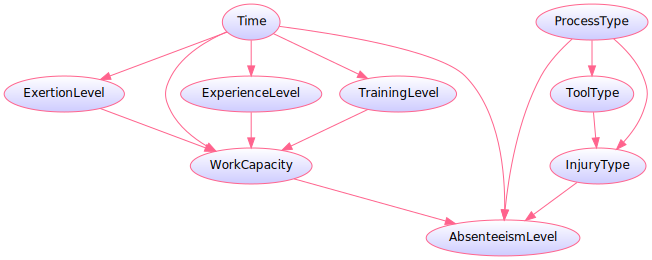

In [52]:
pgmpyToGraph(carModel)

#### Testing marginal independence:
$$
\color{DodgerBlue}{\text{WorkCapacity (unobserved)}: \;\;\;\;\;\;\;  \text{ExertionLevel} \; \bot \; \text{TrainingLevel}}
$$

Given that **WorkCapacity**'s state is NOT observed, we can make the following equivalent statements:
* there is NO active trail between **ExertionLevel** and **TrainingLevel**.
* **ExertionLevel** and **TrainingLevel** are locally independent.
* the probability of **ExertionLevel** won't influence probability of **TrainingLevel** (and vice versa).


**Testing Marginal Independence:** Using Active Trails Methods

In [53]:
# When NOT observing the state of the middle node, there is NO active trail (but need to bserve the Time var state because this is a backdoor)
assert not carModel.is_active_trail(start = ExertionLevel.var, end = TrainingLevel.var, observed = [Time.var])

# When observing the state, there is IS an active trail (also must always account for the backdoor, Time)
assert carModel.is_active_trail(start = ExertionLevel.var, end = TrainingLevel.var, observed = [WorkCapacity.var, Time.var])

assert carModel.is_active_trail(start = ExertionLevel.var, end = TrainingLevel.var, observed = [WorkCapacity.var]), "Check: still need to condition on extra variable for this not to be an active trail"

# Finding out which extra variable to condition on: this is the backdoor
assert observedVars(carModel, startVar = ExertionLevel.var, endVar = TrainingLevel.var) == [{'Time'}], "Check: all list of extra variables (backdoors) to condition on to ACTIVATE active trail between Exertion and Training"



# See, there is no active trail from Exertion to Training when not observing WorkCapacity.
showActiveTrails(carModel, variables = [ExertionLevel.var, TrainingLevel.var], observed = [Time.var])

ExertionLevel --> WorkCapacity
ExertionLevel --> AbsenteeismLevel
TrainingLevel --> WorkCapacity
TrainingLevel --> AbsenteeismLevel


In [54]:

# See, there IS active trail from Exertion to Training when observing WorkCapacity.
showActiveTrails(carModel, variables = [ExertionLevel.var, TrainingLevel.var], observed = [WorkCapacity.var, Time.var])

ExertionLevel --> TrainingLevel
ExertionLevel --> ExperienceLevel
TrainingLevel --> ExertionLevel
TrainingLevel --> ExperienceLevel


**Testing Marginal Independence:** Using Probabilities

In [55]:
# OBS_STATE_WORKCAPACITY: State = 'Low' # remember, not observing the state of the middle node.
OBS_STATE_TIME: int = 23

backdoorStates: Dict[Variable, State] = {Time.var : OBS_STATE_TIME}

TE: DiscreteFactor = elim.query(variables = [ExertionLevel.var], evidence = backdoorStates)

TE_1: DiscreteFactor = elim.query(variables = [ExertionLevel.var], evidence = addEvidence(backdoorStates, {TrainingLevel.var : 'High'}))

TE_2: DiscreteFactor = elim.query(variables = [ExertionLevel.var], evidence = addEvidence(backdoorStates, {TrainingLevel.var : 'Medium'}))

TE_3: DiscreteFactor = elim.query(variables = [ExertionLevel.var], evidence = addEvidence(backdoorStates, {TrainingLevel.var : 'Low'}))
print(TE)

  0%|          | 0/7 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/7 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 7/7 [00:00<00:00, 2870.56it/s]


  0%|          | 0/7 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/7 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/7 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/7 [00:00<?, ?it/s]   

Eliminating: ToolType:   0%|          | 0/7 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/7 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/7 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/7 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 7/7 [00:00<00:00, 117.11it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1743.03it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 142.84it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2550.50it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 208.49it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2435.25it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: WorkCapacity:   0%|          | 0/6 [00:00<?, ?it/s]   

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]    

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 179.43it/s]

+-----------------------+----------------------+
| ExertionLevel         |   phi(ExertionLevel) |
+=======================+======================+
| ExertionLevel(High)   |               0.9927 |
+-----------------------+----------------------+
| ExertionLevel(Low)    |               0.0037 |
+-----------------------+----------------------+
| ExertionLevel(Medium) |               0.0037 |
+-----------------------+----------------------+



The probabilities above are stated formulaically as follows:
$$
\begin{array}{ll}
P(\text{ExertionLevel} = \text{High} \; | \; \Big\{ \text{Time} = 23  \Big\}) \\
= P(\text{ExertionLevel} = \text{High} \; | \; \Big\{ \text{Time} = 23 \Big\} \; \cap \; \text{TrainingLevel} = \text{Low})  \\
= P(\text{ExertionLevel} = \text{High} \; | \; \Big\{ \text{Time} = 23 \Big\} \; \cap \; \text{TrainingLevel} = \text{Medium}) \\
= P(\text{ExertionLevel} = \text{High} \; | \; \Big\{\text{Time} = 23 \Big\} \; \cap \; \text{TrainingLevel} = \text{High}) \\
= 0.9927
\end{array}
$$
$$
\begin{array}{ll}
P(\text{ExertionLevel} = \text{Low} \; | \; \Big\{ \text{Time} = 23 \Big\}) \\
= P(\text{ExertionLevel} = \text{Low} \; | \; \Big\{ \text{Time} = 23 \Big\} \; \cap \; \text{TrainingLevel} = \text{Low})  \\
= P(\text{ExertionLevel} = \text{Low} \; | \; \Big\{ \text{Time} = 23 \Big\} \; \cap \; \text{TrainingLevel} = \text{Medium}) \\
= P(\text{ExertionLevel} = \text{Low} \; | \; \Big\{\text{Time} = 23 \Big\} \; \cap \; \text{TrainingLevel} = \text{High}) \\
= 0.0037
\end{array}
$$
$$
\begin{array}{ll}
P(\text{ExertionLevel} = \text{Medium} \; | \; \Big\{ \text{Time} = 23 \Big\}) \\
= P(\text{ExertionLevel} = \text{Medium} \; | \; \Big\{ \text{Time} = 23 \Big\} \; \cap \; \text{TrainingLevel} = \text{Low})  \\
= P(\text{ExertionLevel} = \text{Medium} \; | \; \Big\{ \text{Time} = 23 \Big\} \; \cap \; \text{TrainingLevel} = \text{Medium}) \\
= P(\text{ExertionLevel} = \text{Medium} \; | \; \Big\{ \text{Time} = 23 \Big\} \; \cap \; \text{TrainingLevel} = \text{High}) \\
= 0.0037
\end{array}
$$

Since all the above stated probabilities are equal for each state of `ExertionLevel` = `Low`, `Medium`, `High`, we can assert that the random variables `TrainingLevel` and `ExertionLevel` are independent of each other, when NOT observing `WorkCapacity` state (but also observing the state of `Time` to adjust for backdoors). Arbitrarily choosing the `backdoorStates` = `{Time = 23}`, we can write:
$$
P(\text{ExertionLevel} \; | \; \{\texttt{backdoorStates} \}) = P(\text{ExertionLevel} \; | \; \{ \texttt{backdoorStates} \} \; \cap \; \text{TrainingLevel})
$$


In [56]:
assert allEqual(TE.values, TE_1.values, TE_2.values, TE_3.values), "Check: the random variables Exertion and Training are independent, when intermediary node WorkCapacity is NOT observed (while accounting for backdoors)"






#### Testing conditional dependence:
$$
\color{Chartreuse}{\text{WorkCapacity (observed)}: \;\;\;\;\;\;\;  \text{ExertionLevel} \longrightarrow \text{WorkCapacity} \longrightarrow \text{TrainingLevel}}
$$
$$
\color{LimeGreen}{\text{WorkCapacity (observed)}: \;\;\;\;\;\;\;  \text{ExertionLevel} \longrightarrow \text{WorkCapacity} \longrightarrow \text{TrainingLevel}}
$$
$$
\color{Green}{\text{WorkCapacity (observed)}: \;\;\;\;\;\;\;  \text{ExertionLevel} \longrightarrow \text{WorkCapacity} \longrightarrow \text{TrainingLevel}}
$$
Given that **WorkCapacity**'s state is observed, we can make the following equivalent statements:
* there IS active trail between **ExertionLevel** and **TrainingLevel**.
* **ExertionLevel** and **TrainingLevel** are dependent.
* the probability of **ExertionLevel** influences probability of **TrainingLevel** (and vice versa).


**Testing Conditional Dependence:** Using Active Trails Methods

In [57]:
assert carModel.is_active_trail(start = ExertionLevel.var, end = TrainingLevel.var, observed = [WorkCapacity.var, Time.var])

# See, there is active trail from ExperienceLevel to AbsenteeismLevel when not observing WorkCapacity variable
showActiveTrails(carModel, variables = [ExertionLevel.var, TrainingLevel.var], observed = [WorkCapacity.var, Time.var])

ExertionLevel --> TrainingLevel
ExertionLevel --> ExperienceLevel
TrainingLevel --> ExertionLevel
TrainingLevel --> ExperienceLevel


**Testing Conditional Dependence:** Using Probabilities

In [58]:
OBS_STATE_WORKCAPACITY: State = 'Low'
OBS_STATE_TIME: int = 23

backdoorStates: Dict[Variable, State] = {Time.var: OBS_STATE_TIME, WorkCapacity.var : OBS_STATE_WORKCAPACITY}

TWE: DiscreteFactor = elim.query(variables = [ExertionLevel.var],
                                 evidence = backdoorStates)
print(TWE)

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2426.56it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 394.15it/s]

+-----------------------+----------------------+
| ExertionLevel         |   phi(ExertionLevel) |
+=======================+======================+
| ExertionLevel(High)   |               0.9975 |
+-----------------------+----------------------+
| ExertionLevel(Low)    |               0.0012 |
+-----------------------+----------------------+
| ExertionLevel(Medium) |               0.0012 |
+-----------------------+----------------------+


In [59]:

TWE_1: DiscreteFactor = elim.query(variables = [ExertionLevel.var],
                                   evidence = addEvidence(backdoorStates, {TrainingLevel.var : 'High'}))
print(TWE_1)

  0%|          | 0/5 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/5 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 5/5 [00:00<00:00, 2444.80it/s]


  0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/5 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 5/5 [00:00<00:00, 351.22it/s]

+-----------------------+----------------------+
| ExertionLevel         |   phi(ExertionLevel) |
+=======================+======================+
| ExertionLevel(High)   |               0.9975 |
+-----------------------+----------------------+
| ExertionLevel(Low)    |               0.0012 |
+-----------------------+----------------------+
| ExertionLevel(Medium) |               0.0012 |
+-----------------------+----------------------+


In [60]:
TWE_2: DiscreteFactor = elim.query(variables = [ExertionLevel.var],
                                   evidence = addEvidence(backdoorStates, {TrainingLevel.var : 'Medium'}))
print(TWE_2)

  0%|          | 0/5 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/5 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 5/5 [00:00<00:00, 3016.18it/s]


  0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/5 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 5/5 [00:00<00:00, 493.34it/s]

+-----------------------+----------------------+
| ExertionLevel         |   phi(ExertionLevel) |
+=======================+======================+
| ExertionLevel(High)   |               0.9927 |
+-----------------------+----------------------+
| ExertionLevel(Low)    |               0.0037 |
+-----------------------+----------------------+
| ExertionLevel(Medium) |               0.0037 |
+-----------------------+----------------------+


In [61]:
TWE_3: DiscreteFactor = elim.query(variables = [ExertionLevel.var],
                                   evidence = addEvidence(backdoorStates, {TrainingLevel.var : 'Low'}))
print(TWE_3)

  0%|          | 0/5 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/5 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 5/5 [00:00<00:00, 2203.82it/s]


  0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/5 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/5 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 5/5 [00:00<00:00, 422.57it/s]

+-----------------------+----------------------+
| ExertionLevel         |   phi(ExertionLevel) |
+=======================+======================+
| ExertionLevel(High)   |               0.9927 |
+-----------------------+----------------------+
| ExertionLevel(Low)    |               0.0037 |
+-----------------------+----------------------+
| ExertionLevel(Medium) |               0.0037 |
+-----------------------+----------------------+



$$
\begin{array}{ll}
P(\text{ExertionLevel} = \text{High} \; | \; \Big\{  \text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23  \Big\}) = 0.9975 \\
\ne P(\text{ExertionLevel} = \text{High} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{TrainingLevel} = \text{Low})  = 0.9927 \\
\ne P(\text{ExertionLevel} = \text{High} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{TrainingLevel} = \text{Medium}) = 0.9927 \\
\ne P(\text{ExertionLevel} = \text{High} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{TrainingLevel} = \text{High})  = 0.9975
\end{array}
$$
$$
\begin{array}{ll}
P(\text{ExertionLevel} = \text{Low} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\}) = 0.0012 \\
\ne P(\text{ExertionLevel} = \text{Low} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{TrainingLevel} = \text{Low})  = 0.0037 \\
\ne P(\text{ExertionLevel} = \text{Low} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{TrainingLevel} = \text{Medium}) = 0.0037 \\
\ne P(\text{ExertionLevel} = \text{Low} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{TrainingLevel} = \text{High}) = 0.0012
\end{array}
$$
$$
\begin{array}{ll}
P(\text{ExertionLevel} = \text{Medium} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\}) = 0.0012 \\
\ne P(\text{ExertionLevel} = \text{Medium} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{TrainingLevel} = \text{Low}) = 0.0037 \\
\ne P(\text{ExertionLevel} = \text{Medium} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{TrainingLevel} = \text{Medium}) = 0.0037 \\
\ne P(\text{ExertionLevel} = \text{Medium} \; | \; \Big\{\text{WorkCapacity} = \text{Low} \; \cap \; \text{Time} = 23 \Big\} \; \cap \; \text{TrainingLevel} = \text{High}) = 0.0012
\end{array}
$$

Since not all the above stated probabilities are equal for each state of `ExertionLevel` = `Low`, `Medium`, `High`, we can assert that the random variables `TrainingLevel` and `ExertionLevel` are dependent, when observing `WorkCapacity` state (and also observing the state of `Time` to adjust for backdoors). Arbitrarily choosing the states `backdoorStates` = `{WorkCapacity = Low, Time = 23}`, we can write:
$$
P(\text{ExertionLevel} \; | \; \{\texttt{backdoorStates} \}) \ne P(\text{ExertionLevel} \; | \; \{ \texttt{backdoorStates} \} \; \cap \; \text{TrainingLevel})
$$

In [62]:

assert not allEqual(TWE.values, TWE_1.values, TWE_2.values, TWE_3.values), "Check: the random variables Exertion and Training are dependent, when intermediary node WorkCapacity is observed (while accounting for backdoors)"

df2 = eliminate(carModel, query = ExertionLevel, evidence = [WorkCapacity, Time])
#df
df2

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2030.65it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 378.18it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2235.17it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 444.01it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2753.67it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 338.39it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1760.59it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 360.35it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2169.28it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 394.62it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2494.88it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 200.89it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2657.43it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 330.39it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2688.94it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 340.32it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2509.31it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 484.22it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2147.62it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 310.12it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1788.49it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 438.65it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2300.98it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 440.30it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 3337.20it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 415.02it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2871.50it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 390.60it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2150.74it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 454.91it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 3300.00it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 508.04it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1288.70it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 448.63it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1416.36it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 465.63it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 3369.37it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 454.42it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2683.21it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 310.93it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2601.39it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 452.18it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2366.99it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 461.49it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 3166.31it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 319.12it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2527.96it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 470.07it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2518.09it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 355.87it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2093.31it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 450.85it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2207.14it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 362.79it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2814.97it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 410.92it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2413.76it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 359.17it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2173.40it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 404.30it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2696.72it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 341.57it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2923.20it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 448.35it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 625.64it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 380.32it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1105.85it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 375.37it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2922.18it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 402.28it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2772.48it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 383.16it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2368.55it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 450.89it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2319.00it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 453.93it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2347.34it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 333.08it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2615.72it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 447.89it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2366.99it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 395.32it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2658.83it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 427.68it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1299.28it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 438.20it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1822.95it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 412.61it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1860.83it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 371.64it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1447.06it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 440.10it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2253.59it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 207.46it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2729.48it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 507.95it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2637.37it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 451.69it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2500.08it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 370.81it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2613.00it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 466.39it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2666.72it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 492.19it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2587.21it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 420.44it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2887.98it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 440.89it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2360.55it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 490.28it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2116.20it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 373.94it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2050.84it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 475.53it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1392.53it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 467.24it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2509.06it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 402.40it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2020.05it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 458.48it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2687.51it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 399.05it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1540.61it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 137.98it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1277.06it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 423.08it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 654.88it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 342.76it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2263.93it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 416.00it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 588.66it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 149.70it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2858.13it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 347.49it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2444.95it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 371.29it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 3678.68it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 267.49it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2607.86it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 431.88it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1048.75it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 436.33it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 3041.92it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 463.76it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1792.82it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 414.35it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 853.08it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 391.05it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2087.24it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 441.70it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1988.76it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 400.85it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2003.97it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 143.00it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1674.60it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 172.08it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1836.92it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 350.66it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2205.40it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 442.59it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2536.11it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 475.54it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1488.22it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 415.36it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 3603.35it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 520.22it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2540.98it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 484.12it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2736.61it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 293.51it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1364.22it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 222.65it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2544.32it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 481.30it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2490.93it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 422.87it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 1686.49it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 429.52it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 6/6 [00:00<00:00, 2697.88it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: InjuryType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ExperienceLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: ToolType:   0%|          | 0/6 [00:00<?, ?it/s]       

Eliminating: ProcessType:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: TrainingLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel:   0%|          | 0/6 [00:00<?, ?it/s]

Eliminating: AbsenteeismLevel: 100%|██████████| 6/6 [00:00<00:00, 468.44it/s]

ExertionLevel          High       Low    Medium
WorkCapacity Time                              
Low          1     0.164853  0.670293  0.164853
             2     0.164853  0.670293  0.164853
             3     0.164853  0.670293  0.164853
             4     0.164853  0.164853  0.670293
             5     0.164853  0.164853  0.670293
...                     ...       ...       ...
High         26    0.164853  0.164853  0.670293
             27    0.670293  0.164853  0.164853
             28    0.670293  0.164853  0.164853
             29    0.670293  0.164853  0.164853
             30    0.670293  0.164853  0.164853

[90 rows x 3 columns]

In [63]:
# ### Causal Reasoning: Experience - Absenteeism Effect